In [1]:
#! python3
import mysql.connector
import pandas as pd
import pytz
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
mydb = mysql.connector.connect(
  host="data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com",
  user="deepAnalytics",
  passwd="Sqltask1234!",
    database="dataanalytics2018"
)

cursor = mydb.cursor(buffered=True)

print(cursor)

MySQLCursorBuffered: (Nothing executed yet)


In [3]:
cursor.execute("SHOW TABLES")
for x in cursor:
  print(x)


('iris',)
('yr_2006',)
('yr_2007',)
('yr_2008',)
('yr_2009',)
('yr_2010',)


In [4]:
#cursor.execute("SELECT * FROM yr_2007")


In [5]:
#Year2007 = cursor.fetchall()

In [6]:
#Yr_2007_pd = pd.DataFrame(Year2007) #Not a good way to convert a sql query

In [7]:
#Yr_2007_pd.head()

In [8]:
#Yr_2007_pd.columns =['id','Date', 'Time','Global_active_power','Global_reactive_power','Global_intensity','Voltage','Submetering_1','Submetering_2','Submetering_3']


In [9]:
#Yr_2007_pd.head(3)

In [10]:
query06= ("Select * from yr_2006")
yr2006_df = pd.read_sql(query06,mydb)

In [11]:
query07= ("Select * from yr_2007")
yr2007_df = pd.read_sql(query07,mydb)

In [12]:
query08= ("Select * from yr_2008")
yr2008_df = pd.read_sql(query08,mydb)


In [13]:
query09= ("Select * from yr_2009")
yr2009_df = pd.read_sql(query09,mydb)

In [14]:
yr2006_df.head(3)

,id,Date,Time,Global_active_power,Global_reactive_power,Global_intensity,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1,2006-12-16,17:24:00,4.216,0.418,18.4,234.84,0.0,1.0,17.0
1,2,2006-12-16,17:25:00,5.360,0.436,23.0,233.63,0.0,1.0,16.0
2,3,2006-12-16,17:26:00,5.374,0.498,23.0,233.29,0.0,2.0,17.0


In [15]:
query10= ("Select * from yr_2010")
yr2010_df = pd.read_sql(query10,mydb)

In [16]:
yr2008_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526905 entries, 0 to 526904
Data columns (total 10 columns):
id                       526905 non-null int64
Date                     526905 non-null object
Time                     526905 non-null object
Global_active_power      526905 non-null float64
Global_reactive_power    526905 non-null float64
Global_intensity         526905 non-null float64
Voltage                  526905 non-null float64
Sub_metering_1           526905 non-null float64
Sub_metering_2           526905 non-null float64
Sub_metering_3           526905 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 40.2+ MB


In [17]:
yr2006_df1 = yr2006_df[['Time','Date','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
yr2007_df1 = yr2007_df[['Time','Date','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
yr2008_df1 = yr2008_df[['Time','Date','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
yr2009_df1 = yr2009_df[['Time','Date','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
yr2010_df1 = yr2010_df[['Time','Date','Sub_metering_1','Sub_metering_2','Sub_metering_3']]


In [18]:
yr2006_df1.head(20)

,Time,Date,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,17:24:00,2006-12-16,0.0,1.0,17.0
1,17:25:00,2006-12-16,0.0,1.0,16.0
2,17:26:00,2006-12-16,0.0,2.0,17.0
3,17:27:00,2006-12-16,0.0,1.0,17.0
4,17:28:00,2006-12-16,0.0,1.0,17.0
5,17:29:00,2006-12-16,0.0,2.0,17.0
6,17:30:00,2006-12-16,0.0,1.0,17.0
7,17:31:00,2006-12-16,0.0,1.0,17.0
8,17:32:00,2006-12-16,0.0,1.0,17.0
9,17:33:00,2006-12-16,0.0,2.0,16.0


In [19]:
yr2006_df1.shape #Number of rows and columns

(21992, 5)

In [20]:
yr2006_df1.apply(pd.Series.value_counts) #Unique values and counts for all columns

,Time,Date,Sub_metering_1,Sub_metering_2,Sub_metering_3
0.0,NaN,NaN,20503.0,15728.0,12650.0
1.0,NaN,NaN,593.0,3299.0,3.0
2.0,NaN,NaN,131.0,1445.0,5.0
3.0,NaN,NaN,6.0,112.0,8.0
4.0,NaN,NaN,5.0,111.0,9.0
5.0,NaN,NaN,5.0,94.0,8.0
6.0,NaN,NaN,5.0,18.0,10.0
7.0,NaN,NaN,4.0,7.0,3.0
8.0,NaN,NaN,6.0,6.0,8.0
9.0,NaN,NaN,7.0,6.0,8.0


In [21]:
yr2006_df1.describe() #Summary statistics for numerical columns

,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,21992.000000,21992.000000,21992.000000
mean,1.248636,2.214987,7.409558
std,6.653184,8.448760,8.660073
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,17.000000
max,77.000000,74.000000,20.000000


In [22]:
yr2006_df1.shape

(21992, 5)

In [23]:
yr2007_df1.shape

(521669, 5)

In [24]:
yr2008_df1.shape

(526905, 5)

In [25]:
yr2009_df1.shape

(521320, 5)

In [26]:
yr2010_df1.shape

(457394, 5)

In [27]:
yr2008_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526905 entries, 0 to 526904
Data columns (total 5 columns):
Time              526905 non-null object
Date              526905 non-null object
Sub_metering_1    526905 non-null float64
Sub_metering_2    526905 non-null float64
Sub_metering_3    526905 non-null float64
dtypes: float64(3), object(2)
memory usage: 20.1+ MB


In [28]:
full_df = pd.concat([yr2006_df1,yr2007_df1,yr2008_df1,yr2009_df1,yr2010_df1]) #join all the tables


In [29]:
full_df.tail()

,Time,Date,Sub_metering_1,Sub_metering_2,Sub_metering_3
457389,20:58:00,2010-11-26,0.0,0.0,0.0
457390,20:59:00,2010-11-26,0.0,0.0,0.0
457391,21:00:00,2010-11-26,0.0,0.0,0.0
457392,21:01:00,2010-11-26,0.0,0.0,0.0
457393,21:02:00,2010-11-26,0.0,0.0,0.0


In [30]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 457393
Data columns (total 5 columns):
Time              object
Date              object
Sub_metering_1    float64
Sub_metering_2    float64
Sub_metering_3    float64
dtypes: float64(3), object(2)
memory usage: 93.8+ MB


In [31]:
full_df['DateTime'] = pd.to_datetime(full_df['Date']+' '+ full_df['Time'])
full_df.set_index('DateTime')

,Time,Date,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,
2006-12-16 17:24:00,17:24:00,2006-12-16,0.0,1.0,17.0
2006-12-16 17:25:00,17:25:00,2006-12-16,0.0,1.0,16.0
2006-12-16 17:26:00,17:26:00,2006-12-16,0.0,2.0,17.0
2006-12-16 17:27:00,17:27:00,2006-12-16,0.0,1.0,17.0
2006-12-16 17:28:00,17:28:00,2006-12-16,0.0,1.0,17.0
2006-12-16 17:29:00,17:29:00,2006-12-16,0.0,2.0,17.0
2006-12-16 17:30:00,17:30:00,2006-12-16,0.0,1.0,17.0
2006-12-16 17:31:00,17:31:00,2006-12-16,0.0,1.0,17.0
2006-12-16 17:32:00,17:32:00,2006-12-16,0.0,1.0,17.0


In [32]:
full_df = full_df.drop(['Date','Time'], axis=1)

In [33]:
full_df.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,0.0,1.0,17.0,2006-12-16 17:24:00
1,0.0,1.0,16.0,2006-12-16 17:25:00
2,0.0,2.0,17.0,2006-12-16 17:26:00
3,0.0,1.0,17.0,2006-12-16 17:27:00
4,0.0,1.0,17.0,2006-12-16 17:28:00


In [34]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 457393
Data columns (total 4 columns):
Sub_metering_1    float64
Sub_metering_2    float64
Sub_metering_3    float64
DateTime          datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 78.2 MB


In [35]:
full_df['DateTime'].head()

0   2006-12-16 17:24:00
1   2006-12-16 17:25:00
2   2006-12-16 17:26:00
3   2006-12-16 17:27:00
4   2006-12-16 17:28:00
Name: DateTime, dtype: datetime64[ns]

In [36]:
#paris_timeZone = pytz.timezone('Europe/Paris')
#full_df['time_local'] = full_df['DateTime'].tz_localize('UTC')
#full_df['DateTime'] = full_df['DateTime'].tz_convert('Europe/Paris')


In [37]:
#Extract the day, month etc from the DateTime column. Same functionality as 'Lubridate' in R
full_df['Year']=  full_df['DateTime'].dt.year #Create a Year column
full_df['Month']=  full_df['DateTime'].dt.month #Create a month column
full_df['Week']=  full_df['DateTime'].dt.week #Create a week column
full_df['Day']=  full_df['DateTime'].dt.day #Create a day column
full_df['Hour']=  full_df['DateTime'].dt.hour #Create a hour column
full_df['Minute']=  full_df['DateTime'].dt.minute #Create a minute column

In [38]:
full_df.head(5)

,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Week,Day,Hour,Minute
0,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,50,16,17,24
1,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,50,16,17,25
2,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,50,16,17,26
3,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,50,16,17,27
4,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,50,16,17,28


In [39]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 457393
Data columns (total 10 columns):
Sub_metering_1    float64
Sub_metering_2    float64
Sub_metering_3    float64
DateTime          datetime64[ns]
Year              int64
Month             int64
Week              int64
Day               int64
Hour              int64
Minute            int64
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 172.0 MB


In [40]:
full_df.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Week,Day,Hour,Minute
0,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,50,16,17,24
1,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,50,16,17,25
2,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,50,16,17,26
3,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,50,16,17,27
4,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,50,16,17,28


In [41]:
full_df.head(10)

,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Week,Day,Hour,Minute
0,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,50,16,17,24
1,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,50,16,17,25
2,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,50,16,17,26
3,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,50,16,17,27
4,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,50,16,17,28
5,0.0,2.0,17.0,2006-12-16 17:29:00,2006,12,50,16,17,29
6,0.0,1.0,17.0,2006-12-16 17:30:00,2006,12,50,16,17,30
7,0.0,1.0,17.0,2006-12-16 17:31:00,2006,12,50,16,17,31
8,0.0,1.0,17.0,2006-12-16 17:32:00,2006,12,50,16,17,32
9,0.0,2.0,16.0,2006-12-16 17:33:00,2006,12,50,16,17,33


In [42]:
full_df.shape

(2049280, 10)

In [43]:
full_df.describe()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Week,Day,Hour,Minute
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.121923e+00,1.298520e+00,6.458447e+00,2.008425e+03,6.454433e+00,2.630510e+01,1.571245e+01,1.150391e+01,2.950043e+01
std,6.153031e+00,5.822026e+00,8.437154e+00,1.124388e+00,3.423209e+00,1.497854e+01,8.801670e+00,6.925189e+00,1.731790e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,2.007000e+03,3.000000e+00,1.300000e+01,8.000000e+00,5.000000e+00,1.500000e+01
50%,0.000000e+00,0.000000e+00,1.000000e+00,2.008000e+03,6.000000e+00,2.600000e+01,1.600000e+01,1.200000e+01,3.000000e+01
75%,0.000000e+00,1.000000e+00,1.700000e+01,2.009000e+03,9.000000e+00,3.900000e+01,2.300000e+01,1.800000e+01,4.500000e+01
max,8.800000e+01,8.000000e+01,3.100000e+01,2.010000e+03,1.200000e+01,5.300000e+01,3.100000e+01,2.300000e+01,5.900000e+01


In [44]:
## for index, row in full_df.itertuples():
 #   if (full_df['Year']==2006):
  #      print("Yes")



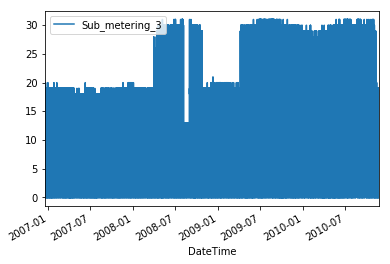

In [45]:
full_df.plot(x='DateTime', y='Sub_metering_3') #submeter 1 view

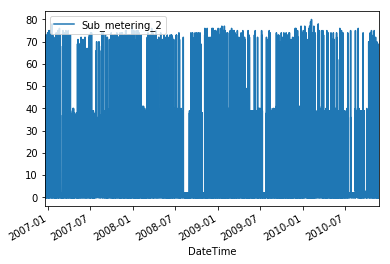

In [46]:
full_df.plot(x='DateTime', y='Sub_metering_2') #Submeter two view

Text(0.5, 0, 'Dates')

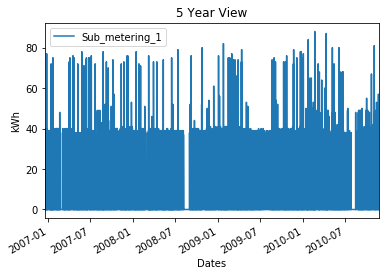

In [47]:
full_df.plot(x='DateTime', y='Sub_metering_1') #Submeter One View
plt.title("5 Year View")
plt.ylabel("kWh")
plt.xlabel("Dates")

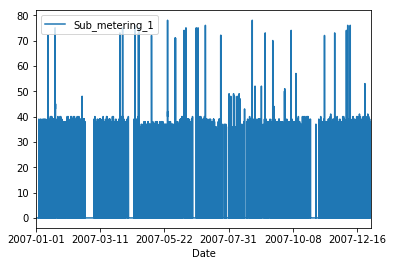

In [48]:
yr2007_df1.plot(x='Date', y='Sub_metering_1')

In [49]:
yr2007_df1.head()

,Time,Date,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,00:00:00,2007-01-01,0.0,0.0,0.0
1,00:01:00,2007-01-01,0.0,0.0,0.0
2,00:02:00,2007-01-01,0.0,0.0,0.0
3,00:03:00,2007-01-01,0.0,0.0,0.0
4,00:04:00,2007-01-01,0.0,0.0,0.0


In [50]:
birthday = yr2006_df1['Date']=='2006-12-16'
time = yr2008_df1['Time']=='00:09:00'
#yr2008_df1[birthday & time]

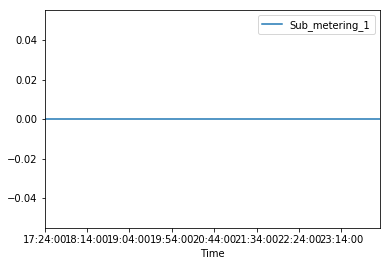

In [51]:
yr2006_df1[birthday].plot(x='Time', y='Sub_metering_1')

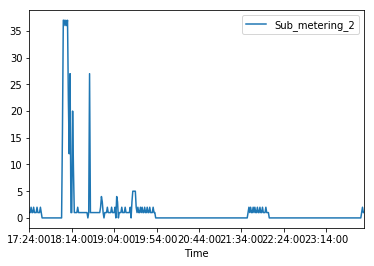

In [52]:
yr2006_df1[birthday].plot(x='Time', y='Sub_metering_2')

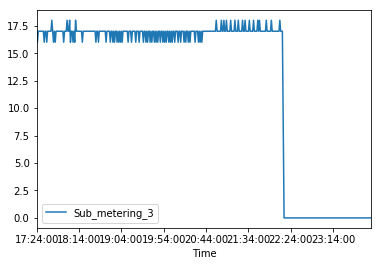

In [53]:
yr2006_df1[birthday].plot(x='Time', y='Sub_metering_3')

In [54]:
#Create multiple plots in one DF
#yr2008_df1.subplot(1,2,1)
#yr2008_df1.plot(x='Time', y='Sub_metering_3')


#yr2007_df1.subplot(1,2,2)
#yr2007_df1.plot(x='Time', y='Sub_metering_3')


AttributeError: 'DataFrame' object has no attribute 'subplot'

In [ ]:
#plt.subplot(2,2,1)
#yr2008_df1.plot(x='Time', y='Sub_metering_3')
#yr2007_df1.plot(x='Time', y='Sub_metering_3')


In [278]:
oneYear = full_df['Year']==2008
oneMonth = full_df['Month']== 5
oneDay = full_df['Day']==13
oneWeek = full_df['Week']==3
oneMinute = full_df['Minute'] == (0 |  10 | 20 | 30 | 40 |  50)

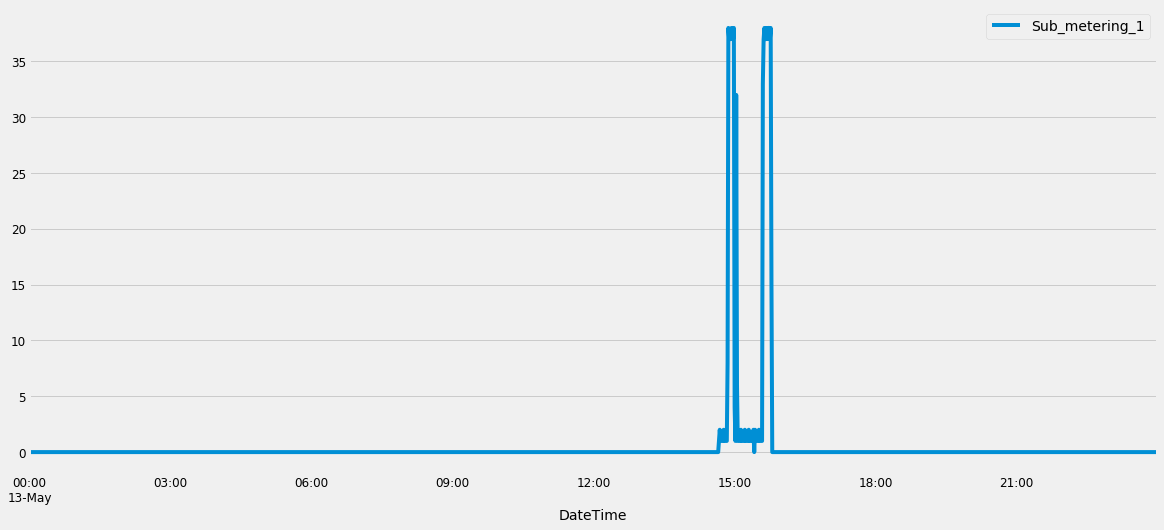

In [279]:
full_df[oneYear & oneMonth & oneDay].plot(x='DateTime', y='Sub_metering_1') #Submeter 1 - Dishwasher, Oven, Microwave
 

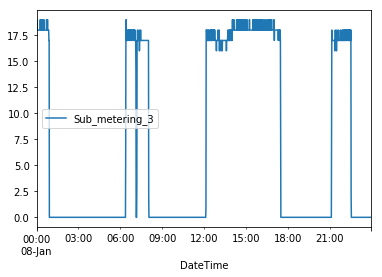

In [57]:
full_df[oneMonth & oneYear & oneDay].plot(x='DateTime', y='Sub_metering_3') #Submeter3 - Water Heater, Aircondition

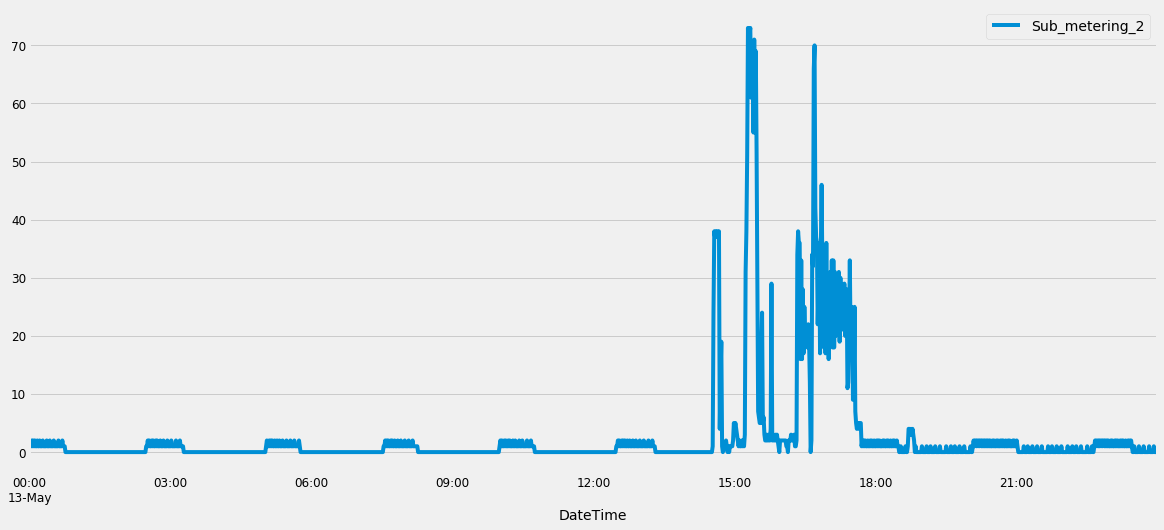

In [280]:
full_df[oneMonth & oneYear & oneDay].plot(x='DateTime', y='Sub_metering_2') #Submeter2 - Fridge, Light, Microwave, Oven

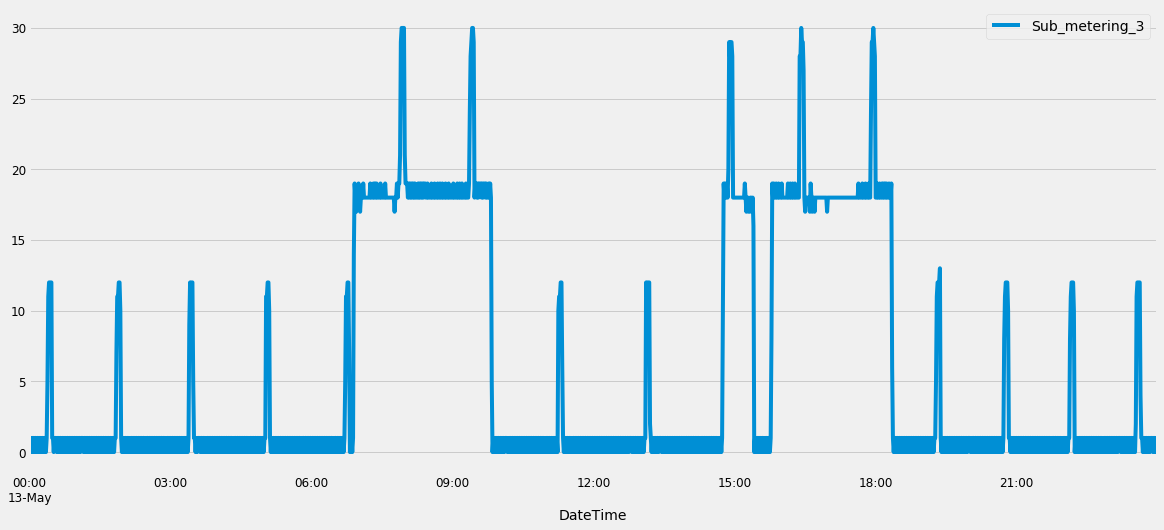

In [329]:
full_df[oneMonth & oneYear & oneDay].plot(x='DateTime', y='Sub_metering_3') #Submeter2 - Fridge, Light, Microwave, Oven

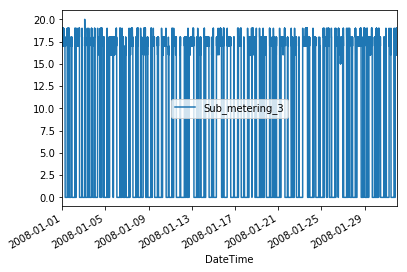

In [59]:
full_df[oneMonth & oneYear].plot(x='DateTime', y='Sub_metering_3') #Aircondition and Water Heater

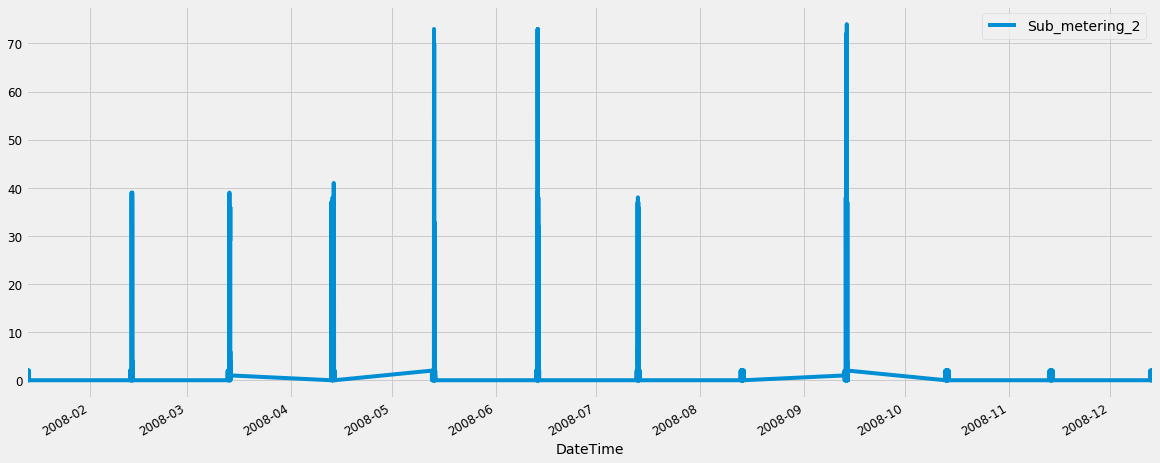

In [281]:
full_df[oneDay & oneYear].plot(x='DateTime', y='Sub_metering_2') #Fridge

In [ ]:
full_df.describe()

In [ ]:
full_df.to_csv("full_IOT_df.csv") #Export file to csv file

In [61]:
full_df.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Week,Day,Hour,Minute
0,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,50,16,17,24
1,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,50,16,17,25
2,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,50,16,17,26
3,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,50,16,17,27
4,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,50,16,17,28


In [62]:
from sklearn.cluster import KMeans


In [283]:
full_df.std()

Sub_metering_1     6.153031
Sub_metering_2     5.822026
Sub_metering_3     8.437154
Year               1.124388
Month              3.423209
Week              14.978541
Day                8.801670
Hour               6.925189
Minute            17.317904
dtype: float64

In [301]:
newX = full_df[oneMonth & oneYear & oneDay]
newX2 = newX[['Sub_metering_3']]
dateX2 = newX[['DateTime']]

In [302]:
newX.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Week,Day,Hour,Minute
191515,0.0,2.0,1.0,2008-05-13 00:00:00,2008,5,20,13,0,0
191516,0.0,1.0,1.0,2008-05-13 00:01:00,2008,5,20,13,0,1
191517,0.0,1.0,1.0,2008-05-13 00:02:00,2008,5,20,13,0,2
191518,0.0,2.0,0.0,2008-05-13 00:03:00,2008,5,20,13,0,3
191519,0.0,1.0,1.0,2008-05-13 00:04:00,2008,5,20,13,0,4


In [303]:
newX2.head()



,Sub_metering_3
191515,1.0
191516,1.0
191517,1.0
191518,0.0
191519,1.0


In [304]:
dateX2.head()

,DateTime
191515,2008-05-13 00:00:00
191516,2008-05-13 00:01:00
191517,2008-05-13 00:02:00
191518,2008-05-13 00:03:00
191519,2008-05-13 00:04:00


In [305]:
newX2.to_csv("sub3_2007.csv")

In [307]:
dateX2.to_csv("date_2008.csv")

In [306]:
kmeans = KMeans(n_clusters=3, random_state=5, algorithm="auto", n_init =200).fit(newX2)


In [308]:
kmeans.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [309]:
kmeans.n_iter_

3

In [310]:
kmeans.cluster_centers_

array([[ 0.74459725],
       [17.28426396],
       [28.64285714]])

In [311]:
label_df = kmeans.labels_

In [312]:
label_df.shape


(1440,)

In [313]:
label_df2 = pd.DataFrame(label_df)

In [314]:
label_df2.shape

(1440, 1)

In [315]:
label_df2.head()

,0
0,0
1,0
2,0
3,0
4,0


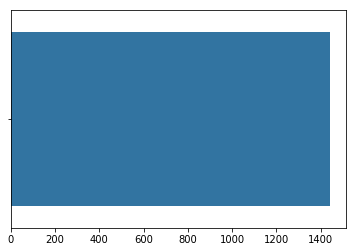

In [183]:
sns.barplot(label_df2.count())

In [316]:
label_df2.to_csv("appliance_clusters.csv") #Export identified clusters to csv file

In [ ]:
#full_df[oneMonth & oneYear & oneDay].plot(x='DateTime', y='Sub_metering_2'

Day_SB2 = full_df[oneYear & oneMonth & oneDay].groupby(['DateTime'])['Sub_metering_1','Sub_metering_2','Sub_metering_3'].sum()
Day_SB2.plot(figsize=(25,10))



In [ ]:
full_df.head()

In [65]:
temperature_df = pd.read_csv('temperature_paris.csv')

In [66]:
temperature_df.head()

,Unnamed: 0,Local time in Paris / Orly (airport),T
0,1,31.12.2010 22:00,-0.2
1,2,31.12.2010 19:00,0.1
2,3,31.12.2010 16:00,1.0
3,4,31.12.2010 13:00,0.9
4,5,31.12.2010 10:00,0.3


In [67]:
temperature_df.columns

Index(['Unnamed: 0', 'Local time in Paris / Orly (airport)', 'T'], dtype='object')

In [68]:
temperature_df.drop(columns='Unnamed: 0', inplace=True)

In [69]:
temperature_df = temperature_df.rename(columns={'Local time in Paris / Orly (airport)': 'DateTime'})

In [70]:
temperature_df.head()

,DateTime,T
0,31.12.2010 22:00,-0.2
1,31.12.2010 19:00,0.1
2,31.12.2010 16:00,1.0
3,31.12.2010 13:00,0.9
4,31.12.2010 10:00,0.3


In [71]:
from datetime import datetime

In [72]:
temperature_df.info()
#Convert Weather datetime into datetime format recognizable by Python
temperature_df['DateTime'] = pd.to_datetime(temperature_df['DateTime'])




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 2 columns):
DateTime    11477 non-null object
T           11470 non-null float64
dtypes: float64(1), object(1)
memory usage: 179.4+ KB


In [73]:
temperature_df.head()

,DateTime,T
0,2010-12-31 22:00:00,-0.2
1,2010-12-31 19:00:00,0.1
2,2010-12-31 16:00:00,1.0
3,2010-12-31 13:00:00,0.9
4,2010-12-31 10:00:00,0.3


In [74]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 2 columns):
DateTime    11477 non-null datetime64[ns]
T           11470 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 179.4 KB


In [75]:
full_df.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Week,Day,Hour,Minute
0,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,50,16,17,24
1,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,50,16,17,25
2,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,50,16,17,26
3,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,50,16,17,27
4,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,50,16,17,28


In [76]:
full_df_joined = full_df.set_index('DateTime').join(temperature_df.set_index('DateTime'))

In [77]:
full_df_joined['T'].isna().sum()

2038236

In [ ]:
full_df_joined.to_csv('temp_demo.csv')

In [78]:
full_df_joined.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Week,Day,Hour,Minute,T
DateTime,,,,,,,,,,
2006-12-16 17:24:00,0.0,1.0,17.0,2006,12,50,16,17,24,NaN
2006-12-16 17:25:00,0.0,1.0,16.0,2006,12,50,16,17,25,NaN
2006-12-16 17:26:00,0.0,2.0,17.0,2006,12,50,16,17,26,NaN
2006-12-16 17:27:00,0.0,1.0,17.0,2006,12,50,16,17,27,NaN
2006-12-16 17:28:00,0.0,1.0,17.0,2006,12,50,16,17,28,NaN


In [128]:
def fill_nas(df):
    last_known_value = 6.0 
    for index, row in df.iterrows():
        if (math.isnan(float(df['T'].iloc[index] ))):
            df['T'].iloc[index] = last_known_value
        else:
            last_known_value = row['T']
    return df


In [119]:
full_df_joined['T'].head()

DateTime
2006-12-16 17:24:00   NaN
2006-12-16 17:25:00   NaN
2006-12-16 17:26:00   NaN
2006-12-16 17:27:00   NaN
2006-12-16 17:28:00   NaN
Name: T, dtype: float64

In [120]:
full_df_joined['T'].iloc[8]

nan

In [121]:
np.isnan(full_df_joined['T'])

DateTime
2006-12-16 17:24:00    True
2006-12-16 17:25:00    True
2006-12-16 17:26:00    True
2006-12-16 17:27:00    True
2006-12-16 17:28:00    True
2006-12-16 17:29:00    True
2006-12-16 17:30:00    True
2006-12-16 17:31:00    True
2006-12-16 17:32:00    True
2006-12-16 17:33:00    True
2006-12-16 17:34:00    True
2006-12-16 17:35:00    True
2006-12-16 17:36:00    True
2006-12-16 17:37:00    True
2006-12-16 17:38:00    True
2006-12-16 17:39:00    True
2006-12-16 17:40:00    True
2006-12-16 17:41:00    True
2006-12-16 17:42:00    True
2006-12-16 17:43:00    True
2006-12-16 17:44:00    True
2006-12-16 17:45:00    True
2006-12-16 17:46:00    True
2006-12-16 17:47:00    True
2006-12-16 17:48:00    True
2006-12-16 17:49:00    True
2006-12-16 17:50:00    True
2006-12-16 17:51:00    True
2006-12-16 17:52:00    True
2006-12-16 17:53:00    True
                       ... 
2010-11-26 20:33:00    True
2010-11-26 20:34:00    True
2010-11-26 20:35:00    True
2010-11-26 20:36:00    True
2010-11-26 

In [122]:
#Fill forward. THis method uses the last known value and fill the next NA with that value.
full_df_joined['T'].fillna(method='ffill', inplace=True)


In [123]:
full_df_joined.tail()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Week,Day,Hour,Minute,T
DateTime,,,,,,,,,,
2010-11-26 20:58:00,0.0,0.0,0.0,2010,11,47,26,20,58,0.3
2010-11-26 20:59:00,0.0,0.0,0.0,2010,11,47,26,20,59,0.3
2010-11-26 21:00:00,0.0,0.0,0.0,2010,11,47,26,21,0,0.3
2010-11-26 21:01:00,0.0,0.0,0.0,2010,11,47,26,21,1,0.3
2010-11-26 21:02:00,0.0,0.0,0.0,2010,11,47,26,21,2,0.3


In [124]:
full_df_joined['T'].fillna(method='bfill', inplace=True)


In [125]:
full_df_joined.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Week,Day,Hour,Minute,T
DateTime,,,,,,,,,,
2006-12-16 17:24:00,0.0,1.0,17.0,2006,12,50,16,17,24,13.5
2006-12-16 17:25:00,0.0,1.0,16.0,2006,12,50,16,17,25,13.5
2006-12-16 17:26:00,0.0,2.0,17.0,2006,12,50,16,17,26,13.5
2006-12-16 17:27:00,0.0,1.0,17.0,2006,12,50,16,17,27,13.5
2006-12-16 17:28:00,0.0,1.0,17.0,2006,12,50,16,17,28,13.5


In [336]:
temp_export = full_df_joined['T']

In [339]:
temp_export.columns

AttributeError: 'Series' object has no attribute 'columns'

In [343]:
temp_export = pd.DataFrame(full_df_joined['T'])

In [346]:
temp_export.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 1 columns):
T    float64
dtypes: float64(1)
memory usage: 111.3 MB


In [335]:
temp_export.to_csv('temp_export.csv') #Export temperature CSV file

In [186]:
import matplotlib.pyplot as plt




In [187]:
sum_sub1 = full_df[oneYear & oneMonth & oneDay]['Sub_metering_1'].sum()
sum_sub2 = full_df[oneYear & oneMonth & oneDay]['Sub_metering_2'].sum()
sum_sub3 = full_df[oneYear & oneMonth & oneDay]['Sub_metering_3'].sum()


In [188]:
sum_sub3

9793.0

# Total view of Submeters for Dataset

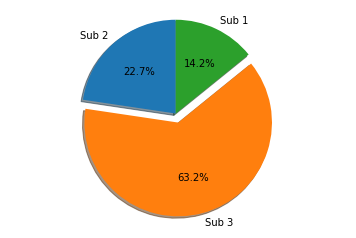

In [189]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:


labels = 'Sub 2', 'Sub 3', 'Sub 1'
sizes = [sum_sub2, sum_sub3, sum_sub1]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
#full_df[oneMonth & oneYear & oneDay].plot(x='DateTime', y='Sub_metering_2'

Day_SB2 = full_df[oneYear & oneMonth & oneDay].groupby(['DateTime'])['Sub_metering_1','Sub_metering_2']
#Day_SB2.plot(figsize=(25,10))

Day_SB2.plot.pie(subplots=True)


# Forecasting 

In [191]:
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib


In [192]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [195]:
full_df_joined.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Week,Day,Hour,Minute,T
DateTime,,,,,,,,,,
2006-12-16 17:24:00,0.0,1.0,17.0,2006,12,50,16,17,24,13.5
2006-12-16 17:25:00,0.0,1.0,16.0,2006,12,50,16,17,25,13.5
2006-12-16 17:26:00,0.0,2.0,17.0,2006,12,50,16,17,26,13.5
2006-12-16 17:27:00,0.0,1.0,17.0,2006,12,50,16,17,27,13.5
2006-12-16 17:28:00,0.0,1.0,17.0,2006,12,50,16,17,28,13.5


In [210]:
y = full_df_joined['Sub_metering_3'].resample('MS').mean()
#full_df_joined['2006']

In [323]:
y['2006':]

DateTime
2006-12-01     7.409558
2007-01-01     7.383351
2007-02-01     6.703557
2007-03-01     6.504648
2007-04-01     4.800339
2007-05-01     5.139964
2007-06-01     4.375907
2007-07-01     3.478285
2007-08-01     5.052714
2007-09-01     5.240405
2007-10-01     5.736816
2007-11-01     6.937590
2007-12-01     8.118977
2008-01-01     6.993324
2008-02-01     6.128745
2008-03-01     6.265149
2008-04-01     6.844398
2008-05-01     6.510596
2008-06-01     6.715503
2008-07-01     5.090461
2008-08-01     1.784690
2008-09-01     6.580602
2008-10-01     6.186223
2008-11-01     6.497071
2008-12-01     6.895959
2009-01-01     7.383812
2009-02-01     7.357065
2009-03-01     7.363614
2009-04-01     7.126256
2009-05-01     6.968546
2009-06-01     6.516330
2009-07-01     4.210413
2009-08-01     4.390135
2009-09-01     6.864991
2009-10-01     7.336746
2009-11-01     7.767055
2009-12-01     8.600497
2010-01-01     9.538004
2010-02-01    10.211667
2010-03-01     7.611574
2010-04-01     7.780064
2010-05

## Visualizing Submeter 3 (AC and Water Heater) Usage Over Time

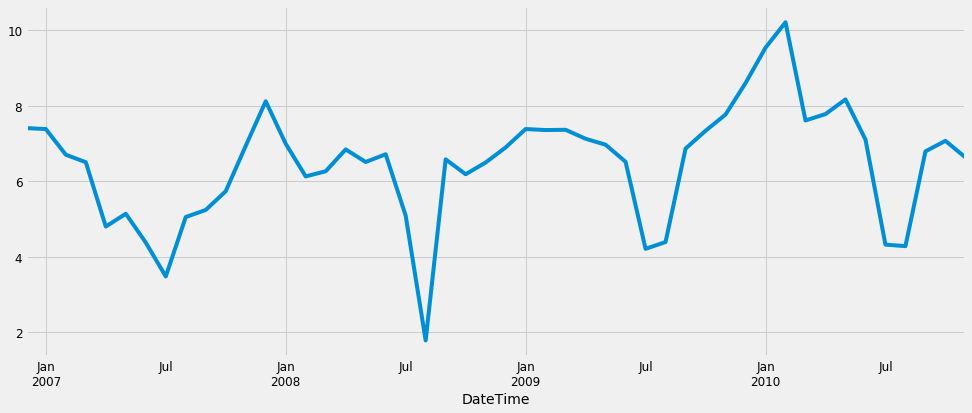

In [211]:
y.plot(figsize=(15, 6))
plt.show()

In [212]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8



## Plot Seasonality, Trend and Residual of S3.

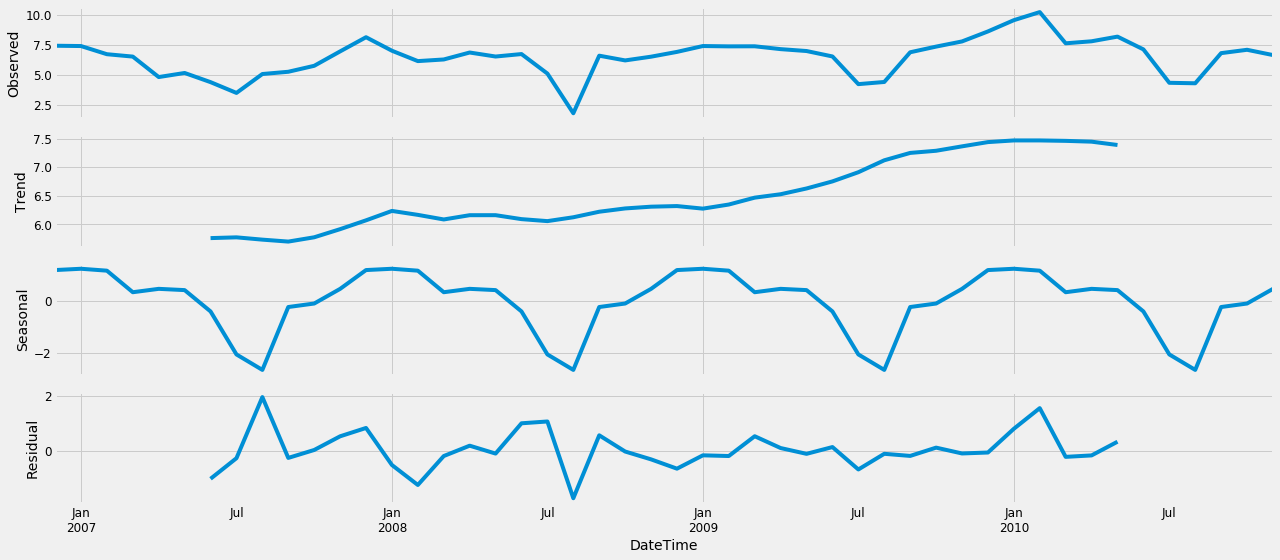

In [222]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [223]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))



Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [284]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:313.2347401562993


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1009.9692149033258
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:121.43595915091954
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:121.5345618826009
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1300.2904526200698


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:79.30800373145385
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:256.0290074825515


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1453.5048727723838
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:118.51243323446677
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:122.97630881800461
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1316.2202762592115
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:72.55181694377816
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:161.77330576713132


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1211.9263734859392
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:130.56230155774566
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:125.65119605665326


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1298.4108809483735
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:65.86260148973108
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:160.54050849730098


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:903.6201260827887
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:114.70089240413382
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:119.914889514525


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:933.5219888311743
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:64.74347372076494
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:165.60995331237783


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1130.6665282813312
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:120.50513490220588
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:120.66468836060704
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:989.3159358248345
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:63.94997271840761
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:164.79380029622862
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1464.003834930032
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:118.5638361283706
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:122.64693884001488
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1326.7190118326032
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:65.32496134006783
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:163.5128764270545


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1131.5071332402244
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:125.66330653793241
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:121.58724245022269


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1162.2585884445634
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:62.756094517819754
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:156.21414332467313


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1231.0324350927654
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:116.01835553877861
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:117.52673053500436
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1260.9394213333171
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:63.236601071058985


C:\Users\Tobi\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Fitting the ARIMA model

In [232]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1854      0.608      0.305      0.760      -1.005       1.376
ma.L1         -0.6079      0.479     -1.269      0.205      -1.547       0.331
ar.S.L12      -0.3793      0.121     -3.128      0.002      -0.617      -0.142
sigma2         0.7181      0.279      2.576      0.010       0.172       1.265


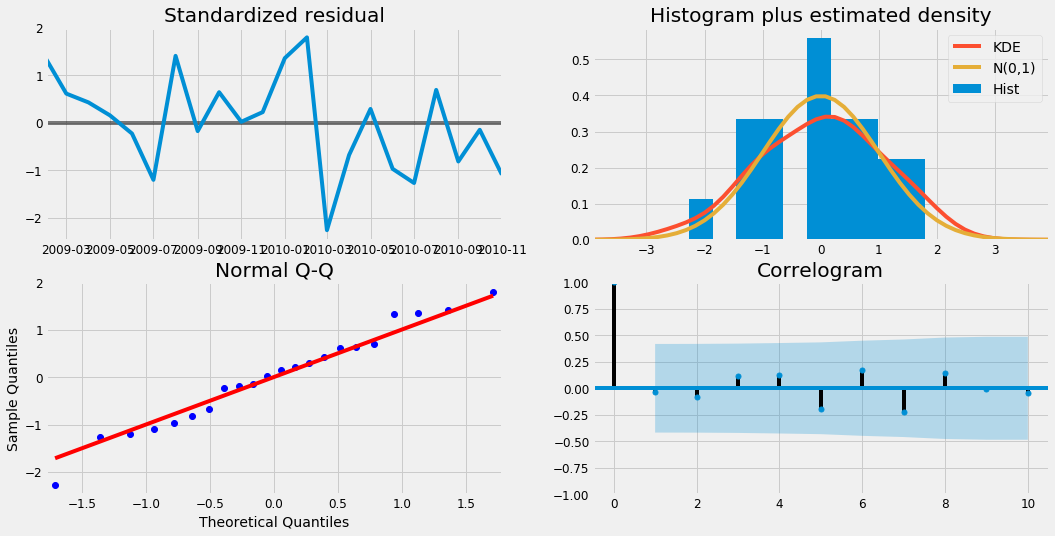

In [233]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Forecasting for 2010

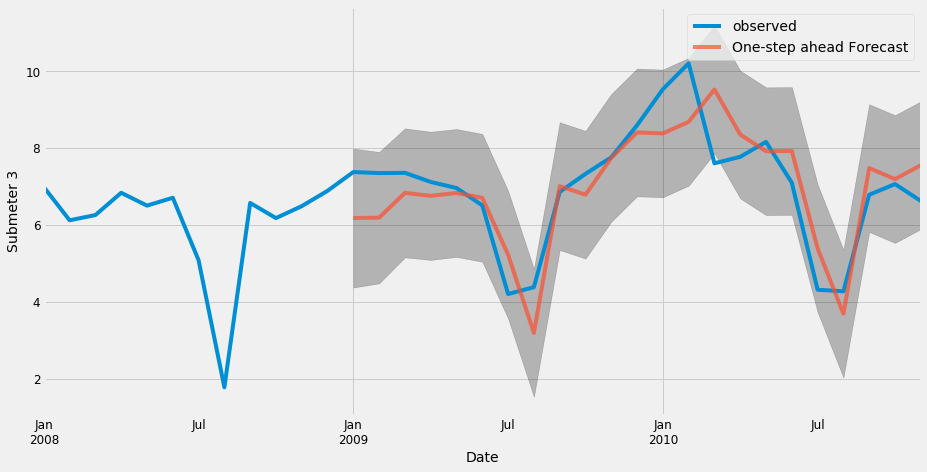

In [328]:
pred = results.get_prediction(start=pd.to_datetime('2009-01-01'), dynamic=False) #Pick year to forecast
pred_ci = pred.conf_int()
ax = y['2008':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Submeter 3')
plt.legend()
plt.show()

In [321]:
y

DateTime
2006-12-01     7.409558
2007-01-01     7.383351
2007-02-01     6.703557
2007-03-01     6.504648
2007-04-01     4.800339
2007-05-01     5.139964
2007-06-01     4.375907
2007-07-01     3.478285
2007-08-01     5.052714
2007-09-01     5.240405
2007-10-01     5.736816
2007-11-01     6.937590
2007-12-01     8.118977
2008-01-01     6.993324
2008-02-01     6.128745
2008-03-01     6.265149
2008-04-01     6.844398
2008-05-01     6.510596
2008-06-01     6.715503
2008-07-01     5.090461
2008-08-01     1.784690
2008-09-01     6.580602
2008-10-01     6.186223
2008-11-01     6.497071
2008-12-01     6.895959
2009-01-01     7.383812
2009-02-01     7.357065
2009-03-01     7.363614
2009-04-01     7.126256
2009-05-01     6.968546
2009-06-01     6.516330
2009-07-01     4.210413
2009-08-01     4.390135
2009-09-01     6.864991
2009-10-01     7.336746
2009-11-01     7.767055
2009-12-01     8.600497
2010-01-01     9.538004
2010-02-01    10.211667
2010-03-01     7.611574
2010-04-01     7.780064
2010-05